In [1]:
import pandas as pd
import numpy as np

In [2]:
full_df = pd.read_csv('/Users/nepets/Desktop/twcs.csv')

In [3]:
full_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
#since we are only interested in text the part for now
df = full_df[['text']]
print('shape is:', df.shape)
df.head()

shape is: (2811774, 1)


,text
0,@115712 I understand. I would like to assist y...
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
3,@115712 Please send us a Private Message so th...
4,@sprintcare I did.


In [5]:
import re, nltk

In [6]:
df['text_lower'] = df.loc[:,'text'].str.lower()
df.head(10)

C:\Users\nepets\AppData\Local\Temp\ipykernel_4712\2072871160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_lower'] = df.loc[:,'text'].str.lower()


,text,text_lower
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...
4,@sprintcare I did.,@sprintcare i did.
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...


In [7]:
import string
punctuations = string.punctuation
print(punctuations)

%timeit
def remove_punctuations(text):
    return text.translate(str.maketrans('','',punctuations))
    

df['text_wo_punct'] = df['text_lower'].apply(lambda text: remove_punctuations(text))
df.head(10)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


C:\Users\nepets\AppData\Local\Temp\ipykernel_4712\3362741488.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_wo_punct'] = df['text_lower'].apply(lambda text: remove_punctuations(text))


,text,text_lower,text_wo_punct
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...,115712 can you please send us a private messag...
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,sprintcare is the worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...,115713 this is saddening to hear please shoot ...
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...,sprintcare you gonna magically change your con...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...,115713 we understand your concerns and wed lik...


In [8]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nepets\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
', '.join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [11]:
stopwords_set = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join(words for words in str(text).split() if words not in stopwords_set)
    

df['text_wo_stop'] = df['text_wo_punct'].apply(lambda text: remove_stopwords(text))
df.head()

C:\Users\nepets\AppData\Local\Temp\ipykernel_4712\1484734733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_wo_stop'] = df['text_wo_punct'].apply(lambda text: remove_stopwords(text))


,text,text_lower,text_wo_punct,text_wo_stop
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare


In [12]:
from collections import Counter
cnt = Counter()

for text in df['text_wo_stop'].values:
    for word in text.split():
        cnt[word] +=1
        
cnt.most_common(10)

[('us', 451262),
 ('please', 402709),
 ('dm', 335374),
 ('help', 267633),
 ('hi', 224603),
 ('thanks', 206452),
 ('get', 200374),
 ('sorry', 192246),
 ('like', 146385),
 ('know', 145407)]

In [13]:
freq_words = set([w for (w,wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return ' '.join(word for word in str(text).split() if word not in freq_words)

df['text_wo_freq'] = df['text_wo_stop'].apply(lambda text:remove_freqwords(text))
df.head()

C:\Users\nepets\AppData\Local\Temp\ipykernel_4712\506248866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_wo_freq'] = df['text_wo_stop'].apply(lambda text:remove_freqwords(text))


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare


In [14]:
n_rare_words = 10
rare_words = set([w for (w,c) in cnt.most_common()][:- n_rare_words: -1])
print(rare_words)

def remove_rarewords(text):
    return ' '.join(word for word in str(text).split() if word not in rare_words)

df['text_wo_freqrare'] = df['text_wo_freq'].apply(lambda text:remove_rarewords(text))
df.head()

{'823867', 'httpstcogfyuq1kjtk', 'httpstco7uqpwyh1b6', '823868', 'httpstco4v1ft0th5x', '823869', '823870', 'httpstcov2tmhetl7q', 'notjustxmasallyearround'}


C:\Users\nepets\AppData\Local\Temp\ipykernel_4712\366235140.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_wo_freqrare'] = df['text_wo_freq'].apply(lambda text:remove_rarewords(text))


,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare


**Data Wrangling** 

This is a very interesting tweet data set, about 3 million tweets, and we have information on the author of the tweets and whether the tweet was a query or a response (the "inbound" column). If the tweet was a query, the response_tweet_id gives the response made by the support team.

In [15]:
first_inbound = full_df[pd.isnull(full_df.in_response_to_tweet_id) & full_df.inbound]

QnR = pd.merge(first_inbound, full_df, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

# Filter to only outbound replies (from companies)
QnR = QnR[QnR.inbound_y ^ True]
print(f'Data shape: {QnR.shape}')
QnR.head()

Data shape: (794299, 14)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [16]:
numbers = '0123456789'
%timeit
def remove_numbers(text):
    return text.translate(str.maketrans('','',numbers))
    

df['text_wo_numb'] = df['text_wo_freqrare'].apply(lambda text: remove_numbers(text))
df.head(10)

,text,text_lower,text_wo_punct,text_wo_stop,text_wo_freq,text_wo_freqrare,text_wo_numb
0,@115712 I understand. I would like to assist y...,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,understand would assist would need private se...
1,@sprintcare and how do you propose we do that,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose
2,@sprintcare I have sent several private messag...,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,@115712 Please send us a Private Message so th...,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 send private message assist click ‘mess...,115712 send private message assist click ‘mess...,send private message assist click ‘message’ t...
4,@sprintcare I did.,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare,sprintcare
5,@115712 Can you please send us a private messa...,@115712 can you please send us a private messa...,115712 can you please send us a private messag...,115712 please send us private message gain det...,115712 send private message gain details account,115712 send private message gain details account,send private message gain details account
6,@sprintcare is the worst customer service,@sprintcare is the worst customer service,sprintcare is the worst customer service,sprintcare worst customer service,sprintcare worst customer service,sprintcare worst customer service,sprintcare worst customer service
7,@115713 This is saddening to hear. Please shoo...,@115713 this is saddening to hear. please shoo...,115713 this is saddening to hear please shoot ...,115713 saddening hear please shoot us dm look kc,115713 saddening hear shoot look kc,115713 saddening hear shoot look kc,saddening hear shoot look kc
8,@sprintcare You gonna magically change your co...,@sprintcare you gonna magically change your co...,sprintcare you gonna magically change your con...,sprintcare gonna magically change connectivity...,sprintcare gonna magically change connectivity...,sprintcare gonna magically change connectivity...,sprintcare gonna magically change connectivity...
9,@115713 We understand your concerns and we'd l...,@115713 we understand your concerns and we'd l...,115713 we understand your concerns and wed lik...,115713 understand concerns wed like please sen...,115713 understand concerns wed send direct mes...,115713 understand concerns wed send direct mes...,understand concerns wed send direct message a...


In [17]:
inbound_df = full_df[full_df['inbound']==True]
inbound_df['author_id'].value_counts().head(20)

115911    1286
120576    1010
115913     563
116230     454
169172     448
117627     406
115888     332
116136     295
116421     276
115722     252
115714     250
115850     243
115990     243
121239     210
203476     197
115725     194
115798     181
127296     176
170351     174
169916     172
Name: author_id, dtype: int64

In [18]:
df['text_wo_numb'].value_counts().head(20)

 here’s work around issue it’s fixed future software update httpstcoxxaxeesrt                    5168
 awaiting response resolve ur issue pls provide within next  hrs rgds idea care                  1529
                                                                                                 1242
amazonhelp                                                                                       1068
 offer support via twitter english contact preferred language httpstcoibiyvmgpj                  1064
 immediately connected critical response line click call button enter number httpstcojojkltck     978
 send email address connect                                                                       950
applesupport                                                                                      838
 send email address assist                                                                        808
 offer support via twitter english spanish httpstcoibiyvmgpj join httpstcooczyrxio

In [19]:
import datetime
pd.to_datetime(full_df['created_at']).dt.dayofweek.value_counts()

4    453028
2    445838
3    440361
1    423052
0    387847
5    332606
6    329042
Name: created_at, dtype: int64

In [20]:
count_df = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
count_df.columns = ['word','count']
count_df.head(10)

,word,count
0,115712,10
1,understand,26439
2,would,102136
3,like,146385
4,assist,72397
5,need,101407
6,get,200374
7,private,6506
8,secured,561
9,link,57752


In [21]:
count_df['count'].describe()

count    1.560486e+06
mean     2.064757e+01
std      9.842111e+02
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.512620e+05
Name: count, dtype: float64

KeyboardInterrupt: 

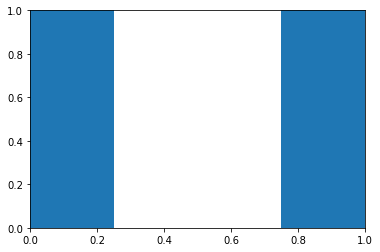

In [22]:
count_df.plot.bar(x='word', y='count', rot=90)

<AxesSubplot:xlabel='word'>

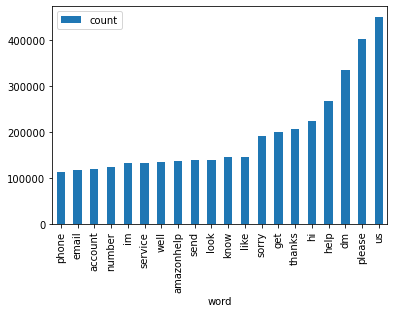

In [23]:
count_df.sort_values('count').tail(20).plot.bar(x='word', y='count', rot=90)

<AxesSubplot:>

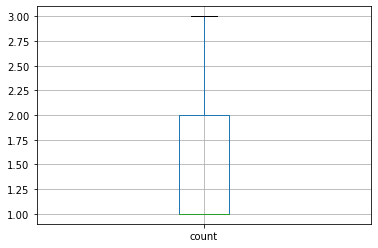

In [24]:
count_df.boxplot(column =['count'], showfliers=False)

<AxesSubplot:xlabel='word'>

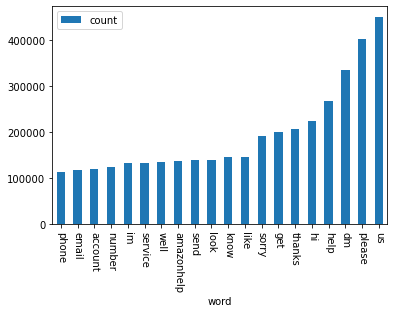

In [25]:
count_df.sort_values('count').tail(20).plot.bar(x='word', y='count', rot=270)